# Final Project Submission

Please fill out:
* Student name: Joey Husney
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL: https://jhusney1.github.io/why_is_multicollinearity_a_problem_for_linear_regression


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

## Project goals and methodology

As a real estate agency, we need to give recommendations to customers on how to increase the value of their home. This will be done through analyzing the data in the "King County House Sales" dataset and investigating which features are correlated with higher sales prices. Using the OSEMN process, we hope to give suggestions that are meaningful and reliable. The OSEMN framework consists of an iterative process of Obtaining the data, Scrubbing it, Exploring, Modeling, and iNterpreting the data into meaningful suggestions for the client.

## The Data

The king county house sales dataset contains data from houses sold between the time period May 2014 - May 2015. The following features are contained in this dataset:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# OBTAIN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

from scipy import stats
import statsmodels.api as sm  
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

pd.options.display.max_columns = 100

plt.style.use('seaborn-poster')
plt.rcParams['figure.figsize'] = (20,15)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
kings_df = pd.read_csv('kc_house_data.csv')
kings_df.drop(['id'], axis=1, inplace=True)
kings_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,nan,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,2/25/2015,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


In [3]:
kings_df.shape

(21597, 20)

In [4]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


## Observations
* May want to convert date column to date datatype
* sqr foot basement should be a float instead of string
* Get rid of null values
* Separate categorical and continuous columns

# SCRUB

### Modify necessary datatypes

In [5]:
kings_df_cleaned = kings_df.copy()
# kings_df_cleaned['date'] = pd.to_datetime(kings_df_cleaned['date']) 
## dropping for now
kings_df_cleaned.drop(['date'], axis=1, inplace=True)

In [6]:
kings_df_cleaned.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Check for NULL values

In [7]:
kings_df_cleaned.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Deal with null values

In [8]:
kings_df_cleaned['waterfront'].head()

0       nan
1   0.00000
2   0.00000
3   0.00000
4   0.00000
Name: waterfront, dtype: float64

In [9]:
kings_df_cleaned['waterfront'].value_counts(normalize=True, dropna=False)

0.00000   0.88322
nan       0.11002
1.00000   0.00676
Name: waterfront, dtype: float64

<AxesSubplot:xlabel='price'>

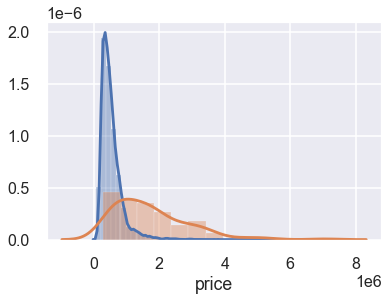

In [10]:
df_no_waterfront = kings_df_cleaned[kings_df_cleaned['waterfront'] == 0] 
df_yes_waterfront = kings_df_cleaned[kings_df_cleaned['waterfront'] == 1] 
sns.distplot(df_no_waterfront['price'], label='no waterfront')
sns.distplot(df_yes_waterfront['price'], label='with waterfront')

### Seems like sale price increases due to waterfront, therefore, this feature will stay. We will get rid of null values by replacing the nulls with 0 assuming they don't have a waterfront if it's unavailable.

In [11]:
# replace null values with zero
kings_df_cleaned['waterfront'].fillna(0, inplace=True)

In [12]:
kings_df_cleaned['waterfront'].value_counts(normalize=True, dropna=False)

0.00000   0.99324
1.00000   0.00676
Name: waterfront, dtype: float64

### Now let's anylize the null values in view column

In [13]:
kings_df_cleaned['view'].value_counts(normalize=True, dropna=False)

0.00000   0.89929
2.00000   0.04431
3.00000   0.02352
1.00000   0.01528
4.00000   0.01468
nan       0.00292
Name: view, dtype: float64

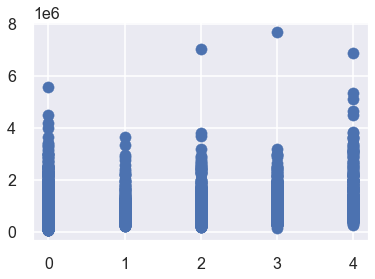

In [14]:
fig, ax = plt.subplots()
ax.scatter(kings_df_cleaned['view'], kings_df_cleaned['price'])

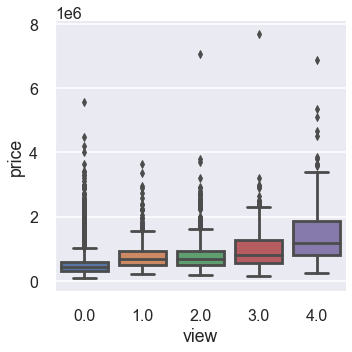

In [15]:
sns.catplot(data=kings_df_cleaned, x='view', y='price', kind='box')

### For simplicity sake and to get rid of null values, we will create boolean values based on whether or not the house has been viewed

In [16]:
def convert_to_bool(x):
    if x > 0:
        x = 1
    else:
        x = 0
    return x

In [17]:
kings_df_cleaned['view'] = kings_df_cleaned['view'].map(convert_to_bool)
kings_df_cleaned['view'].value_counts(normalize=True, dropna=False)

0   0.90221
1   0.09779
Name: view, dtype: float64

In [18]:
kings_df_cleaned.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [19]:
kings_df['yr_renovated'].value_counts(normalize=True, dropna=False)

0.00000      0.78766
nan          0.17790
2014.00000   0.00338
2003.00000   0.00144
2013.00000   0.00144
               ...  
1944.00000   0.00005
1948.00000   0.00005
1976.00000   0.00005
1934.00000   0.00005
1953.00000   0.00005
Name: yr_renovated, Length: 71, dtype: float64

> Because 78% of these houses were not renovated, we will make this column into a 0 and 1's column based on whether each particular house was renovated or not

In [20]:
kings_df_cleaned['yr_renovated'] = kings_df_cleaned['yr_renovated'].map(convert_to_bool)

In [21]:
kings_df_cleaned['yr_renovated'].value_counts(normalize=True, dropna=False)

0   0.96555
1   0.03445
Name: yr_renovated, dtype: float64

In [22]:
kings_df_cleaned.rename(columns={'yr_renovated': 'renovated'}, inplace=True)
kings_df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0,3,7,1180,0.0,1955,0,98178,47.51120,-122.25700,1340,5650
1,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0,3,7,2170,400.0,1951,1,98125,47.72100,-122.31900,1690,7639
2,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0,3,6,770,0.0,1933,0,98028,47.73790,-122.23300,2720,8062
3,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0,5,7,1050,910.0,1965,0,98136,47.52080,-122.39300,1360,5000
4,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0,3,8,1680,0.0,1987,0,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00000,3,2.50000,1530,1131,3.00000,0.00000,0,3,8,1530,0.0,2009,0,98103,47.69930,-122.34600,1530,1509
21593,400000.00000,4,2.50000,2310,5813,2.00000,0.00000,0,3,8,2310,0.0,2014,0,98146,47.51070,-122.36200,1830,7200
21594,402101.00000,2,0.75000,1020,1350,2.00000,0.00000,0,3,7,1020,0.0,2009,0,98144,47.59440,-122.29900,1020,2007
21595,400000.00000,3,2.50000,1600,2388,2.00000,0.00000,0,3,8,1600,0.0,2004,0,98027,47.53450,-122.06900,1410,1287


In [23]:
kings_df_cleaned['renovated'].value_counts(normalize=True, dropna=False)

0   0.96555
1   0.03445
Name: renovated, dtype: float64

In [24]:
kings_df_cleaned.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> We now got rid of all known null values!

#### Convert sqft_basement from String to Float data type

In [25]:
kings_df_cleaned['sqft_basement'] = pd.to_numeric(kings_df_cleaned['sqft_basement'], errors='coerce')
kings_df_cleaned['sqft_basement']

0         0.00000
1       400.00000
2         0.00000
3       910.00000
4         0.00000
           ...   
21592     0.00000
21593     0.00000
21594     0.00000
21595     0.00000
21596     0.00000
Name: sqft_basement, Length: 21597, dtype: float64

In [26]:
kings_df_cleaned['sqft_basement'].value_counts(normalize=True, dropna=False)

0.00000      0.59388
nan          0.02102
600.00000    0.01005
500.00000    0.00968
700.00000    0.00963
               ...  
588.00000    0.00005
1920.00000   0.00005
2390.00000   0.00005
1245.00000   0.00005
1135.00000   0.00005
Name: sqft_basement, Length: 304, dtype: float64

> Something must be done about these newly discovered null values. Perhaps we will assume that a null value means no basement. Partially because the mode is zero anyhow.

In [27]:
kings_df_cleaned['sqft_basement'].fillna(0, inplace=True)
kings_df_cleaned['sqft_basement'].value_counts(normalize=True, dropna=False)

0.00000      0.61490
600.00000    0.01005
500.00000    0.00968
700.00000    0.00963
800.00000    0.00931
               ...  
915.00000    0.00005
295.00000    0.00005
1281.00000   0.00005
2130.00000   0.00005
906.00000    0.00005
Name: sqft_basement, Length: 303, dtype: float64

### Question 2: Is there any multicollinearity occuring between different columns therby skewing the model for sale price?

In [28]:
def check_multicol(df):
    
    corr = df.corr().abs()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0, annot=True)

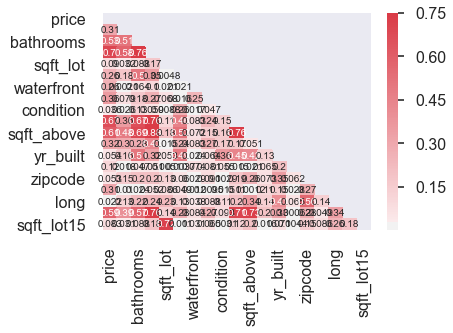

In [29]:
check_multicol(kings_df_cleaned)

### Answer 2: Multicollinearity found in following combinations:
* sqft_above and sqft_living
* sqft_living and bathrooms
* grade and sqft_living
* sqft_above and sqft_living
* sqft_above and grade
* sqft_living15 and sqft_living
* sqft_living15 and sqft_above
* sqft_living15 and grade
* sqft_lot15 and sqft_lot

In [30]:
# High multicolinearity occuring in sqft_living
# Check if it adds any value to dataset
sqft_sample = kings_df_cleaned[kings_df_cleaned['sqft_basement'] > 0].sample(5, random_state=15)
sqft_sample[['sqft_above', 'sqft_living', 'sqft_basement']]
# telling us to drop sqft_living - no added value

,sqft_above,sqft_living,sqft_basement
8367,1080,1370,290.00000
20021,2242,3490,1248.00000
16657,1100,2110,1010.00000
20430,1140,1405,265.00000
12953,1500,2750,1250.00000


### Drop sqft_living

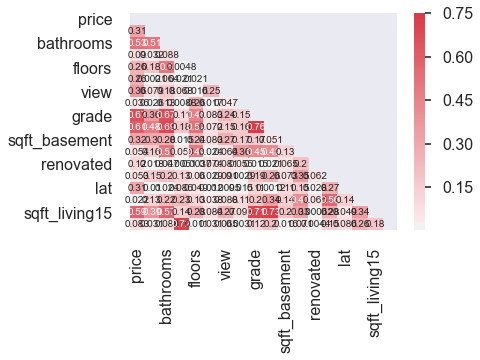

In [31]:
kings_df_cleaned.drop(['sqft_living'], axis=1, inplace=True)
check_multicol(kings_df_cleaned)

### Drop some other columns that aren't so important in the bigger scheme of things

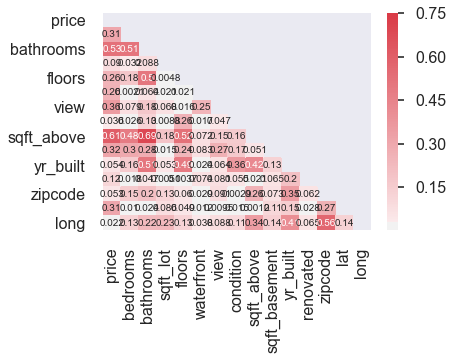

In [32]:
kings_df_cleaned.drop(['sqft_living15'], inplace=True, axis=1)
kings_df_cleaned.drop(['sqft_lot15'], inplace=True, axis=1)
kings_df_cleaned.drop(['grade'], inplace=True, axis=1)
check_multicol(kings_df_cleaned)

# EXPLORE

In [33]:
# # trying to get markers on map
# import folium
# min_long = kings_df_cleaned['long'].min()
# max_long = kings_df_cleaned['long'].max()
# min_lat = kings_df_cleaned['lat'].min()
# max_lat = kings_df_cleaned['lat'].max()
# # print(min_long, max_long, min_lat, max_lat)
# m = folium.Map()
# m.fit_bounds([[min_lat, min_long], [max_lat, max_long]])

# for i in range(0,len(kings_df_cleaned)):
#     folium.Marker([kings_df_cleaned.iloc[i]['long'], kings_df_cleaned.iloc[i]['lat']]).add_to(m)
    
# m


### Identify outliers

<AxesSubplot:xlabel='price'>

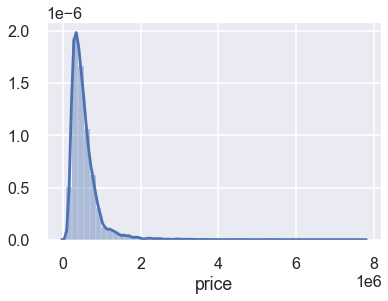

In [34]:
target = 'price'
sns.distplot(kings_df_cleaned[target])

<AxesSubplot:xlabel='price'>

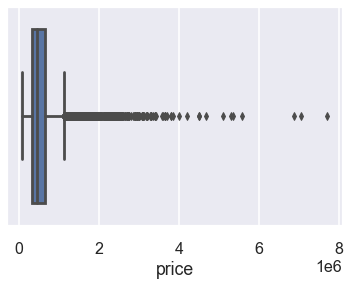

In [35]:
sns.boxplot(kings_df_cleaned[target])

> We see clearly from both the histogram and the whisker plot that there are many outliers for price column

### Remove outliers

In [36]:
import scipy
z_price = scipy.stats.zscore(kings_df_cleaned['price'])
z_price = np.abs(z_price)
z_price

array([0.86671627, 0.00625157, 0.98077344, ..., 0.37618606, 0.38190525,
       0.58606486])

<AxesSubplot:xlabel='price'>

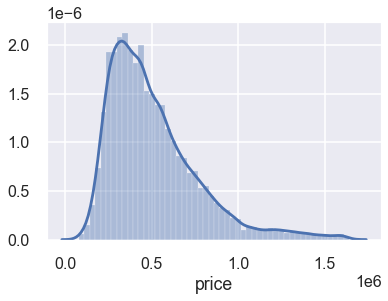

In [37]:
# Preview histogram before changing
sns.distplot(kings_df_cleaned[z_price < 3]['price'])

In [38]:
# Make changes
kings_df_cleaned = kings_df_cleaned[z_price < 3]
kings_df_cleaned.shape


# Maybe go back and remove more outliers from other cols based on modeling

(21191, 15)

<AxesSubplot:xlabel='price'>

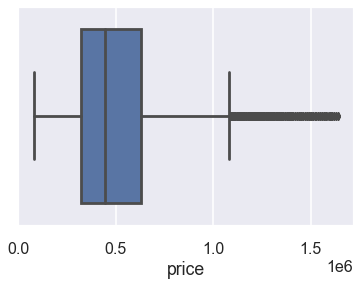

In [39]:
sns.boxplot(kings_df_cleaned[target])

### Make sure data is accurate

In [40]:
kings_df_cleaned.describe().round(2)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
count,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000,21191.00000
mean,507010.29000,3.36000,2.09000,14826.73000,1.49000,0.00000,0.09000,3.41000,1751.50000,275.05000,1970.93000,0.03000,98078.29000,47.56000,-122.21000
std,259462.21000,0.92000,0.74000,40400.95000,0.54000,0.06000,0.28000,0.65000,772.21000,422.58000,29.29000,0.18000,53.41000,0.14000,0.14000
min,78000.00000,1.00000,0.50000,520.00000,1.00000,0.00000,0.00000,1.00000,370.00000,0.00000,1900.00000,0.00000,98001.00000,47.16000,-122.52000
25%,320000.00000,3.00000,1.50000,5005.50000,1.00000,0.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47000,-122.33000
50%,447000.00000,3.00000,2.25000,7560.00000,1.00000,0.00000,0.00000,3.00000,1544.00000,0.00000,1975.00000,0.00000,98065.00000,47.57000,-122.23000
75%,627650.00000,4.00000,2.50000,10490.50000,2.00000,0.00000,0.00000,4.00000,2170.00000,530.00000,1996.00000,0.00000,98118.00000,47.68000,-122.12000
max,1640000.00000,33.00000,7.50000,1651359.00000,3.50000,1.00000,1.00000,5.00000,7320.00000,2850.00000,2015.00000,1.00000,98199.00000,47.78000,-121.32000


In [41]:
kings_df_cleaned[kings_df_cleaned['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
15856,640000.00000,33,1.75000,6000,1.00000,0.00000,0,5,1040,580.00000,1947,0,98103,47.68780,-122.33100


In [42]:
kings_df_cleaned[(kings_df_cleaned['bedrooms'] == 3) & (kings_df_cleaned['bathrooms'] == 2) & (kings_df_cleaned['floors'] == 1) & (kings_df_cleaned['sqft_basement'] != 0)].head(50)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
164,420000.00000,3,2.00000,38332,1.00000,0.00000,0,4,1010,1010.00000,1975,0,98027,47.45820,-122.02300
221,279950.00000,3,2.00000,9750,1.00000,0.00000,0,3,1350,400.00000,1961,0,98198,47.39800,-122.29900
236,416000.00000,3,2.00000,94300,1.00000,0.00000,0,5,1640,580.00000,1976,0,98010,47.34590,-121.95000
250,260000.00000,3,2.00000,7209,1.00000,0.00000,0,4,1240,570.00000,1978,0,98032,47.36560,-122.27800
316,487000.00000,3,2.00000,14052,1.00000,0.00000,0,5,1720,870.00000,1948,0,98133,47.73570,-122.33300
387,252350.00000,3,2.00000,7352,1.00000,0.00000,0,3,1160,490.00000,1979,0,98058,47.46120,-122.16900
427,1300000.00000,3,2.00000,15021,1.00000,0.00000,0,4,1770,580.00000,1976,0,98004,47.64080,-122.21900
468,340500.00000,3,2.00000,28025,1.00000,0.00000,0,4,1920,350.00000,1947,0,98168,47.48570,-122.31800
494,397500.00000,3,2.00000,6710,1.00000,0.00000,0,3,1070,440.00000,1972,0,98034,47.71930,-122.21600
608,223000.00000,3,2.00000,6824,1.00000,0.00000,0,3,1300,370.00000,1990,0,98042,47.36660,-122.08400


In [43]:
kings_df_cleaned = kings_df_cleaned[kings_df_cleaned['bedrooms'] != 33] 
kings_df_cleaned.describe().round(2)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
count,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000,21190.00000
mean,507004.02000,3.35000,2.09000,14827.15000,1.49000,0.00000,0.09000,3.41000,1751.53000,275.03000,1970.93000,0.03000,98078.29000,47.56000,-122.21000
std,259466.72000,0.89000,0.74000,40401.85000,0.54000,0.06000,0.28000,0.65000,772.21000,422.59000,29.29000,0.18000,53.41000,0.14000,0.14000
min,78000.00000,1.00000,0.50000,520.00000,1.00000,0.00000,0.00000,1.00000,370.00000,0.00000,1900.00000,0.00000,98001.00000,47.16000,-122.52000
25%,320000.00000,3.00000,1.50000,5005.25000,1.00000,0.00000,0.00000,3.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47000,-122.33000
50%,447000.00000,3.00000,2.25000,7560.00000,1.00000,0.00000,0.00000,3.00000,1547.00000,0.00000,1975.00000,0.00000,98065.00000,47.57000,-122.23000
75%,627500.00000,4.00000,2.50000,10490.75000,2.00000,0.00000,0.00000,4.00000,2170.00000,530.00000,1996.00000,0.00000,98118.00000,47.68000,-122.12000
max,1640000.00000,11.00000,7.50000,1651359.00000,3.50000,1.00000,1.00000,5.00000,7320.00000,2850.00000,2015.00000,1.00000,98199.00000,47.78000,-121.32000


# Check for linearity and normality 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

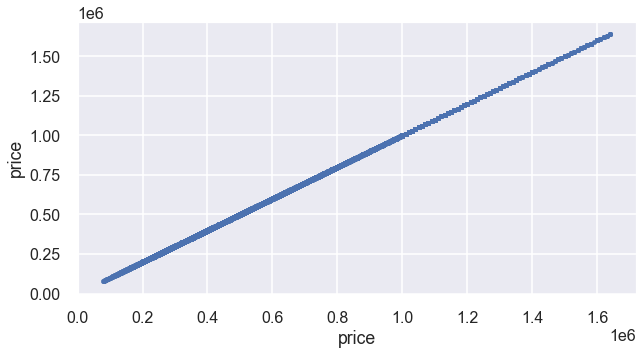

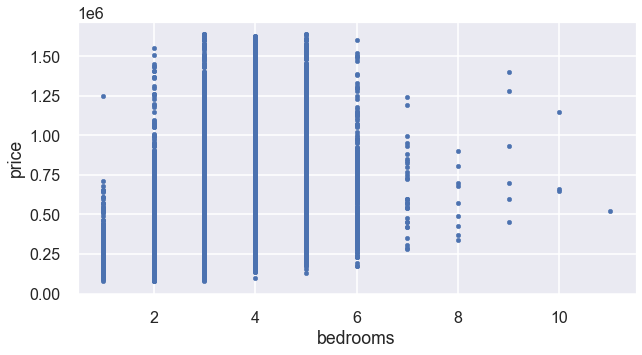

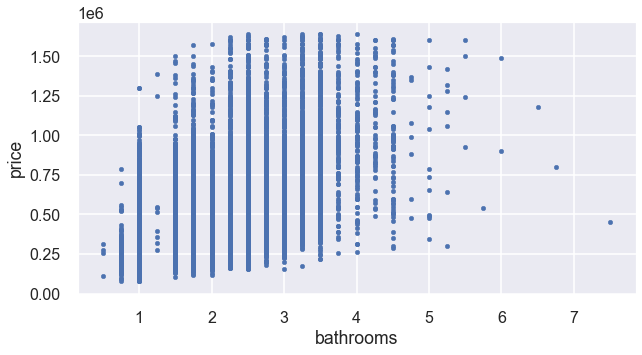

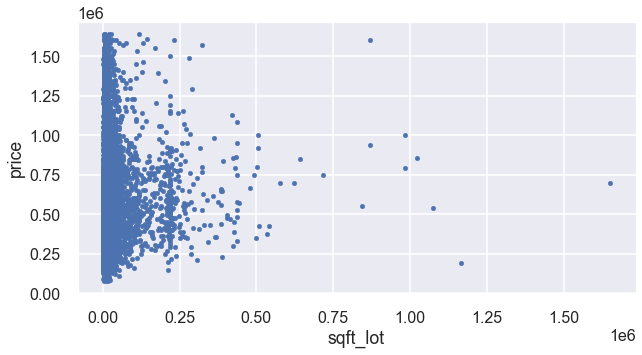

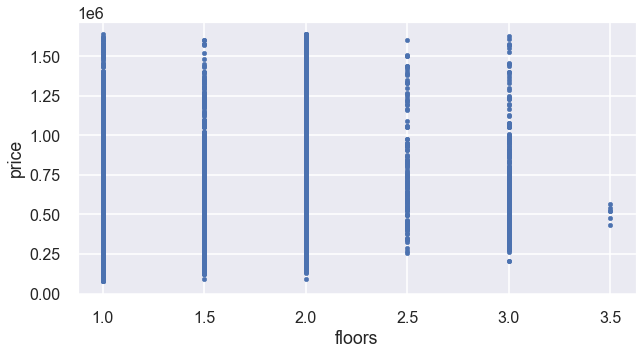

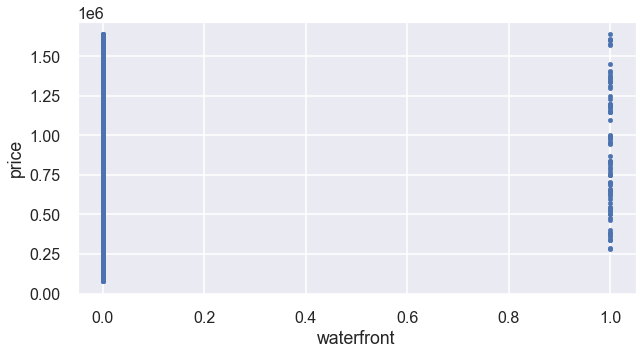

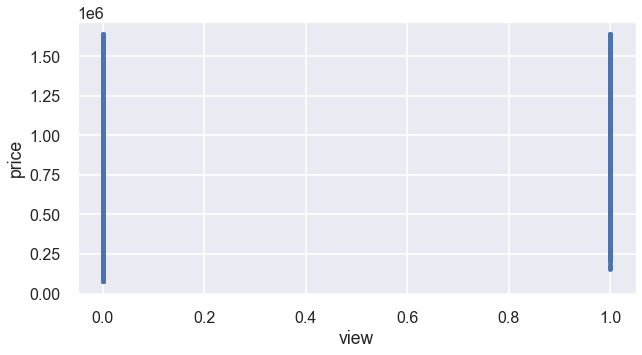

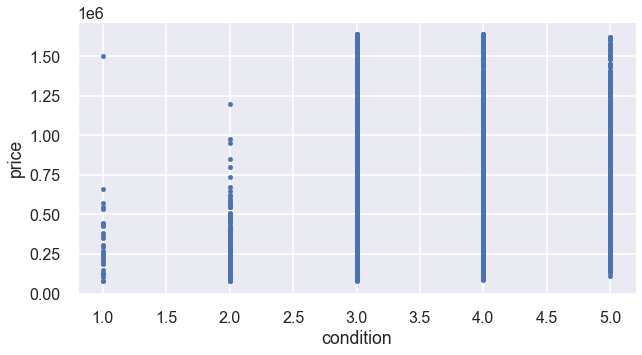

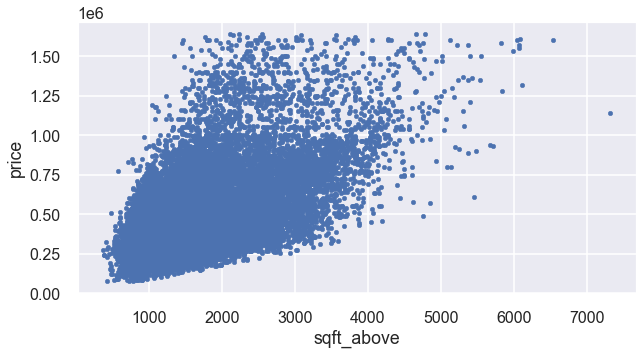

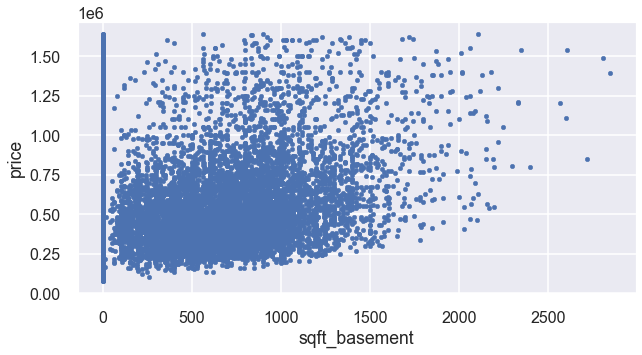

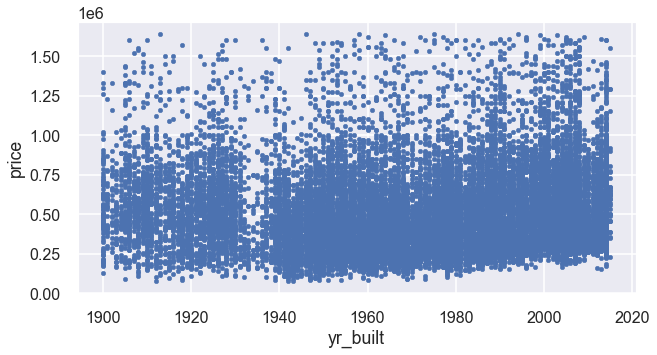

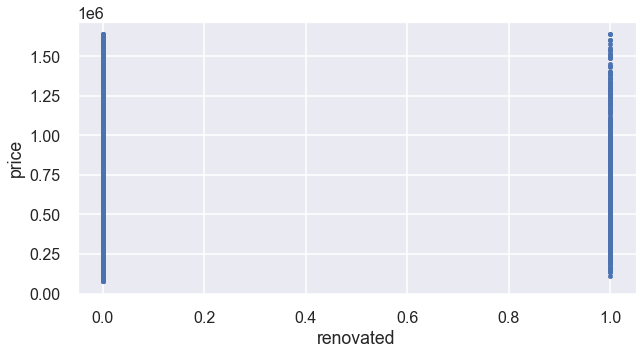

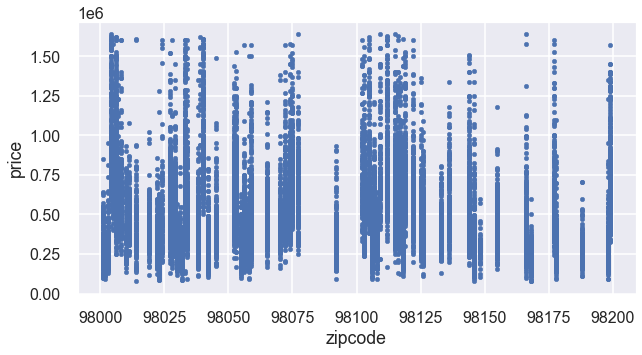

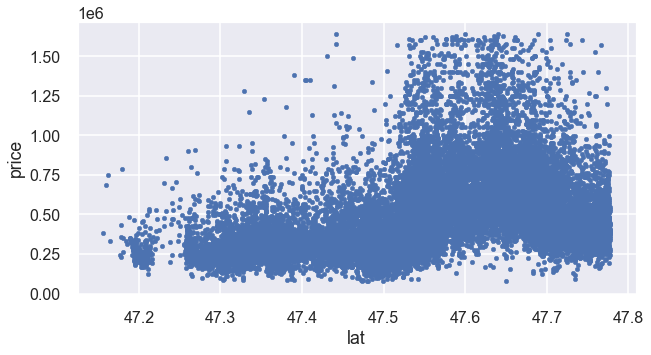

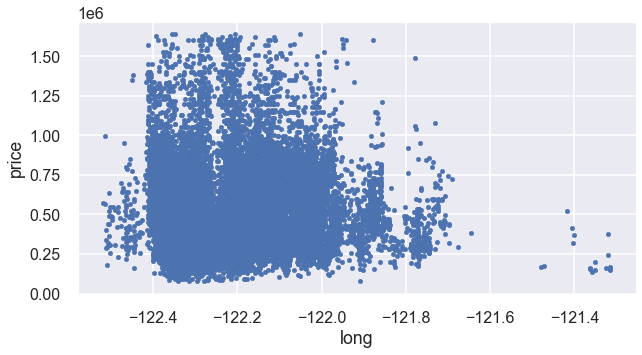

In [61]:
for col in kings_df_cleaned.columns:
    kings_df_cleaned.plot(kind='scatter', x=col, y= 'price', figsize=(10,5) )

In [ ]:
pd.plotting.scatter_matrix(kings_df_cleaned, figsize=(18,20));

### Log transform to make more linear and more normal

array([[<AxesSubplot:title={'center':'bathrooms_log'}>,
        <AxesSubplot:title={'center':'bedrooms_log'}>,
        <AxesSubplot:title={'center':'condition_log'}>,
        <AxesSubplot:title={'center':'floors_log'}>],
       [<AxesSubplot:title={'center':'lat_log'}>,
        <AxesSubplot:title={'center':'long_log'}>,
        <AxesSubplot:title={'center':'price_log'}>,
        <AxesSubplot:title={'center':'renovated_log'}>],
       [<AxesSubplot:title={'center':'sqft_above_log'}>,
        <AxesSubplot:title={'center':'sqft_basement_log'}>,
        <AxesSubplot:title={'center':'sqft_lot_log'}>,
        <AxesSubplot:title={'center':'view_log'}>],
       [<AxesSubplot:title={'center':'waterfront_log'}>,
        <AxesSubplot:title={'center':'yr_built_log'}>,
        <AxesSubplot:title={'center':'zipcode_log'}>, <AxesSubplot:>]],
      dtype=object)

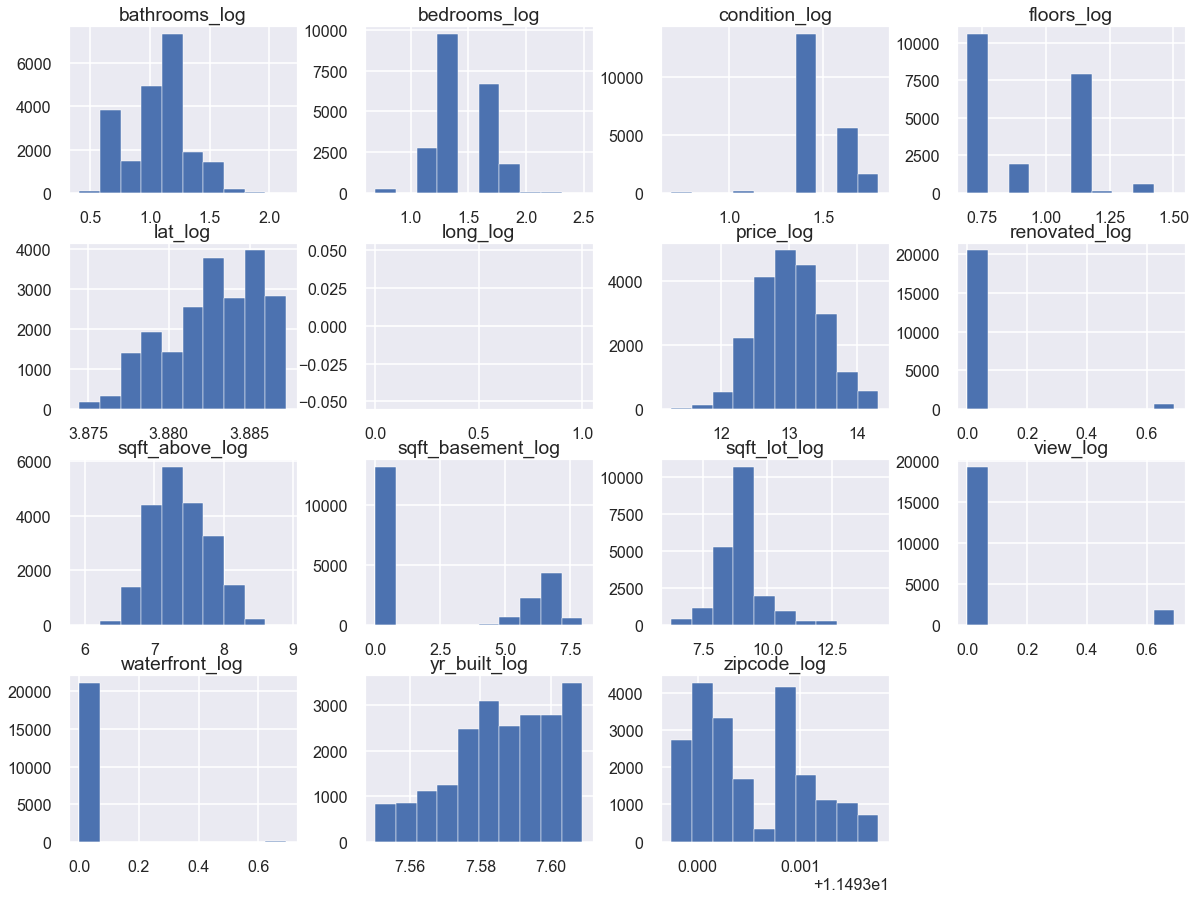

In [92]:
kings_df_log = pd.DataFrame([])

for col in kings_df_cleaned:
    kings_df_log[col+'_log'] = np.log(kings_df_cleaned[col]+1)

kings_df_log.hist(figsize=(20,15))

In [89]:
kings_df_log

,pricelog,bedroomslog,bathroomslog,sqft_lotlog,floorslog,waterfrontlog,viewlog,conditionlog,sqft_abovelog,sqft_basementlog,yr_builtlog,renovatedlog,zipcodelog,latlog,longlog
0,12.30999,1.38629,0.69315,8.63959,0.69315,0.00000,0.00000,1.38629,7.07412,0.00000,7.57866,0.00000,11.49455,3.88179,nan
1,13.19562,1.38629,1.17865,8.88779,1.09861,0.00000,0.00000,1.38629,7.68294,5.99396,7.57661,0.69315,11.49401,3.88611,nan
2,12.10072,1.09861,0.69315,9.21044,0.69315,0.00000,0.00000,1.38629,6.64769,0.00000,7.56735,0.00000,11.49302,3.88646,nan
3,13.31133,1.60944,1.38629,8.51739,0.69315,0.00000,0.00000,1.79176,6.95750,6.81454,7.58376,0.00000,11.49412,3.88199,nan
4,13.14217,1.38629,1.09861,8.99727,0.69315,0.00000,0.00000,1.38629,7.42714,0.00000,7.59488,0.00000,11.49349,3.88397,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.79386,1.38629,1.25276,7.03174,1.38629,0.00000,0.00000,1.38629,7.33368,0.00000,7.60589,0.00000,11.49378,3.88566,nan
21593,12.89922,1.60944,1.25276,8.66802,1.09861,0.00000,0.00000,1.38629,7.74544,0.00000,7.60837,0.00000,11.49422,3.88178,nan
21594,12.90446,1.09861,0.55962,7.20860,1.09861,0.00000,0.00000,1.38629,6.92854,0.00000,7.60589,0.00000,11.49420,3.88351,nan
21595,12.89922,1.38629,1.25276,7.77863,1.09861,0.00000,0.00000,1.38629,7.37838,0.00000,7.60340,0.00000,11.49301,3.88227,nan


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

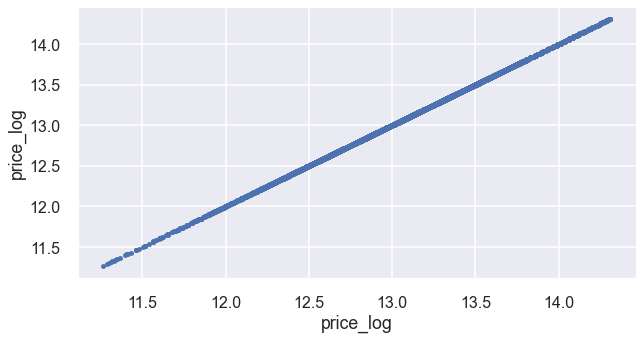

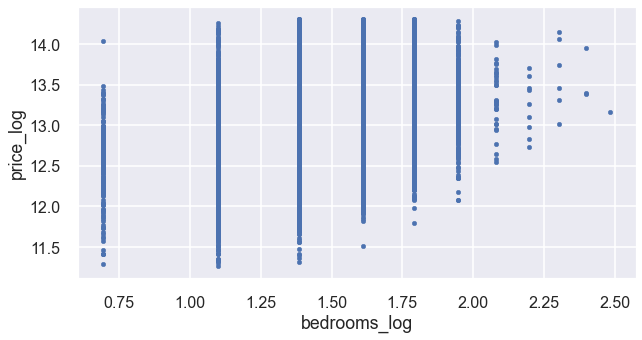

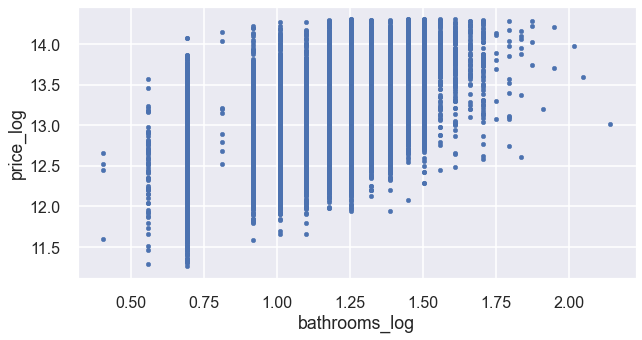

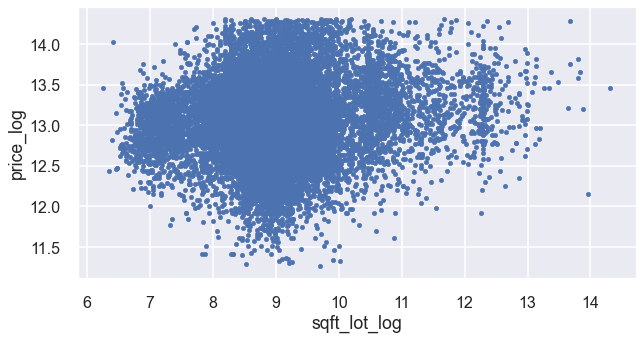

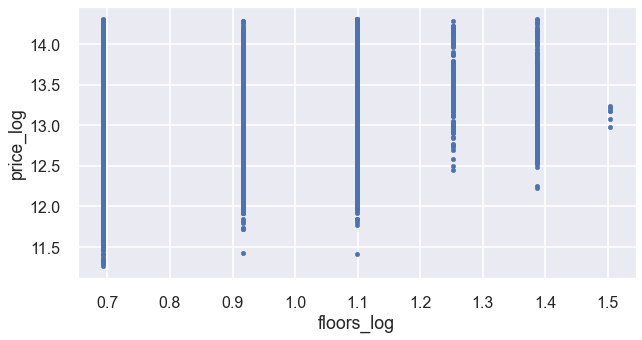

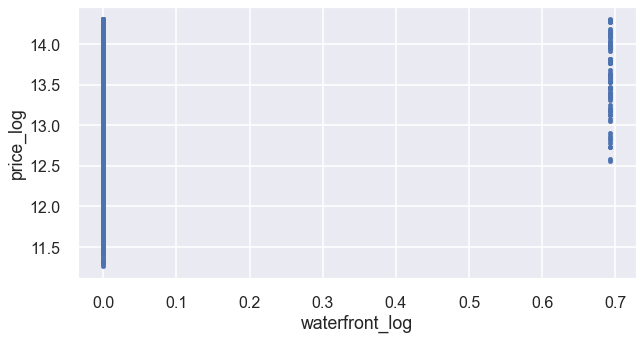

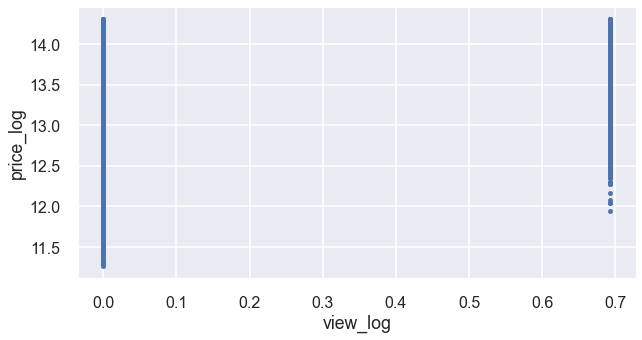

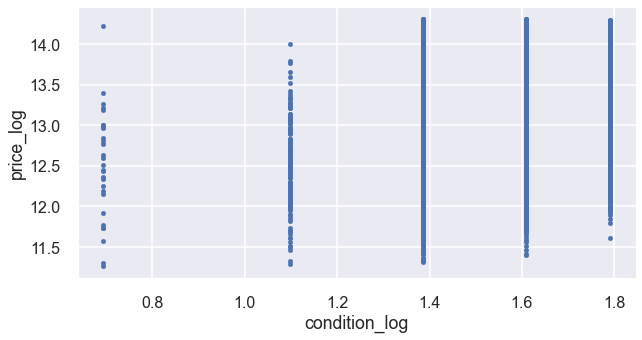

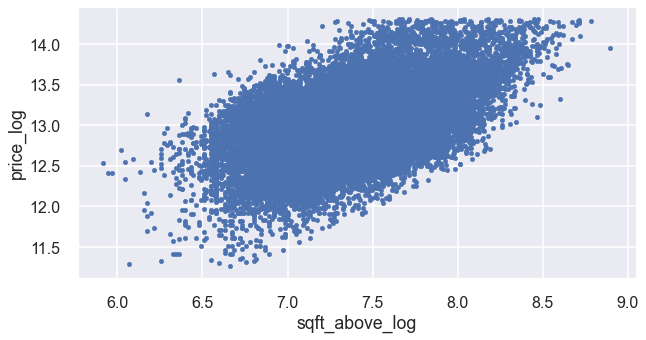

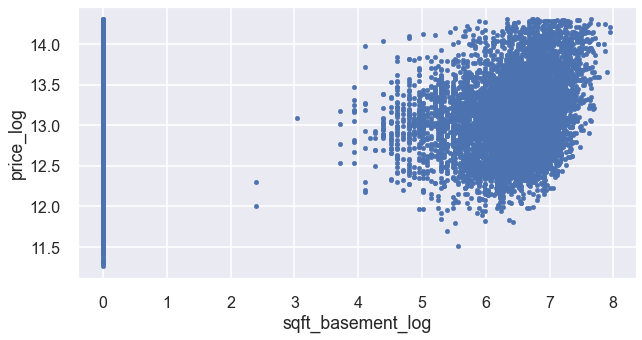

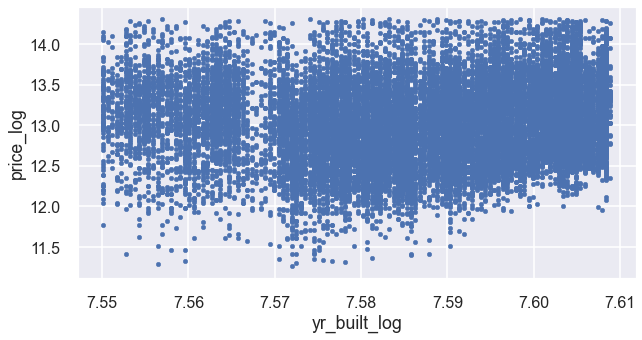

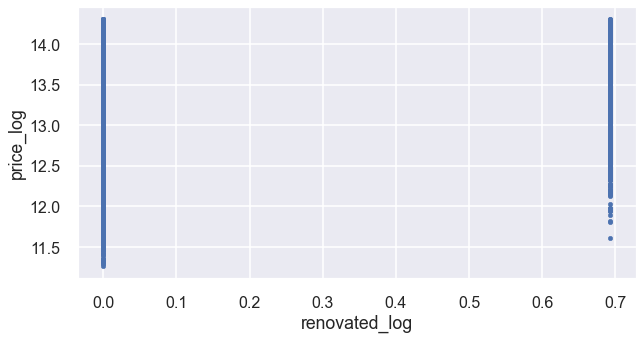

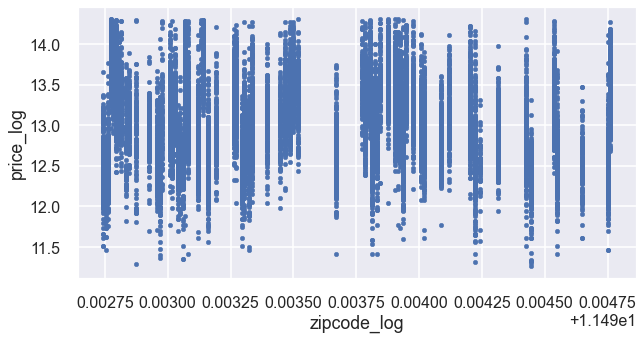

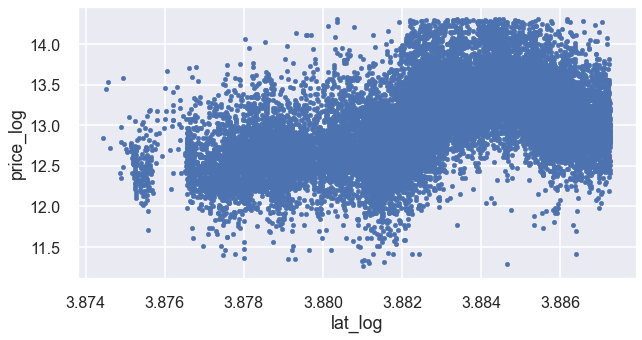

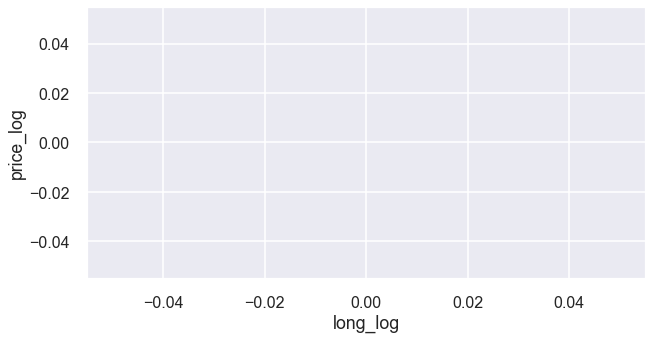

In [94]:
for col in kings_df_log.columns:
    kings_df_log.plot(kind='scatter', x=col, y= 'price_log', figsize=(10,5) )

### Question 2: Which columns should be considered categorical?

### Answer 3: Zip code

In [ ]:
cat_cols = ['zipcode']
kings_df_cleaned_ohe = pd.get_dummies(data=kings_df_cleaned, columns= cat_cols, drop_first=True)
kings_df_cleaned_ohe.head()

# MODEL

In [ ]:
kings_df_cleaned_ohe.head()

In [ ]:
def model_data(df_ohe_, target='price'):

    df_ohe = df_ohe_.copy()
    
    feat = '+'.join(df_ohe.drop(columns=target).columns)
    f = target + '~'+ feat
    model = ols(formula=f, data=df_ohe).fit()
    return model

In [ ]:
model = model_data(kings_df_cleaned_ohe)
model.summary()

In [ ]:
# model.params.sort_values().tail(40)

In [ ]:
check_assumptions(model.resid)

High p-values:
- yr_built
- some zipcodes

In [ ]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
keep_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
keep_cols.remove('Intercept')
keep_cols.append('price')
print(len(p_table), len(keep_cols))
print(keep_cols)

In [ ]:

kings_df_cleaned_ohe = kings_df_cleaned_ohe[list(keep_cols)]
kings_df_cleaned_ohe

In [ ]:
model = model_data(kings_df_cleaned_ohe)
model.summary()

In [ ]:
check_assumptions(model.resid)

In [ ]:
# df_logged = kings_df_cleaned_ohe.iloc[:,0:11]
# df_logged['price'] = kings_df_cleaned_ohe['price']
# df_logged

# pd.DataFrame.hist(df_logged)
# df_logged.head()

In [ ]:
# for feat in df_logged.columns:
#     df_logged[feat] = df_logged[feat].map(lambda x: np.log(x+1))
# pd.DataFrame.hist(df_logged)


In [ ]:
# for col in df_logged:
#     kings_df_cleaned_ohe[col] = df_logged[col]
# kings_df_cleaned_ohe.head()

In [ ]:
price = kings_df_cleaned_ohe['price']
kings_df_cleaned_ohe.drop(labels=['price'], axis=1, inplace=True)
kings_df_cleaned_ohe.insert(loc=0, column='price', value=price)

In [ ]:
scaler = StandardScaler()
scaler.fit(continueous_features)

In [ ]:
x_scaled = scaler.transform(continueous_features)
x_scaled

In [ ]:
scaled_df = pd.DataFrame(x_scaled, columns=kings_df_cleaned_ohe.iloc[:,0:13].columns)

# for col in kings_df_cleaned_ohe.iloc[:,13:].columns:
#     scaled_df[col] = kings_df_cleaned_ohe[col]
# scaled_df.head(15)
scaled_df.hist()

In [ ]:
check_assumptions(scaled_df)

# INTERPRET

# CONCLUSIONS & RECOMMENDATIONS

- People should try to maximize the square footage of their home in order to have a higher chance of getting it to sell for more money
- It may be worthwhile to invest in making the condition better in order to sell it for more